In [ ]:
! pip install scikit-commpy

     |████████████████████████████████| 52 kB 707 kB/s 
  Created wheel for scikit-commpy: filename=scikit_commpy-0.7.0-py3-none-any.whl size=58556 sha256=5bc690e383ee8b3ca4ce7fb208272a9512ce9498b380f81b42ad8765515ed8d0
  Stored in directory: /root/.cache/pip/wheels/52/2a/a2/2daff6a2d5e3b96d70fb03e5b0699ce70c98cb4c00c8107c38
Successfully built scikit-commpy


In [ ]:
def Hermitian(matrix):
    [raws,columns]=matrix.shape
    conjec= np.zeros((raws,columns), dtype=complex)
    i=0
    while i<columns:
          conjec[:,i]=np.conj(matrix[:,i])
          i+=1
    reversed_conjec=conjec[-1::-1]
    z = np.zeros((1,L)) 
    modulated_uncodeda=np.vstack(z)
    modulated_uncodeda=np.vstack((modulated_uncodeda,matrix))
    modulated_uncodedb=np.vstack((modulated_uncodeda,z))
    Hermitian_Data=np.vstack((modulated_uncodedb,reversed_conjec))
    return Hermitian_Data

def PAPRformatrix(matrix):
    [raws,columns]=matrix.shape
    PAPR = np.zeros(columns)
    PAPRdB = np.zeros(columns)
    s=0
    while s<columns:
            max=np.max(matrix[:,s]*np.conj(matrix[:,s]))
            mean=np.sum(matrix[:,s]*np.transpose(np.conj(matrix[:,s])))/len(matrix[:,s])
            PAPR[s]=max/mean
            PAPRdB[s]=10*np.log10(PAPR[s])
            s+=1
    return [PAPR,PAPRdB]

def PAPRforcolumn(matrix):
    raws=matrix.shape
    PAPR = np.zeros(1)
    PAPRdB = np.zeros(1)
    max=np.max(matrix*np.conj(matrix))
    mean=np.sum(matrix*np.transpose(np.conj(matrix)))/len(matrix)
    PAPR=max/mean
    PAPRdB=10*np.log10(PAPR) 
    return [PAPR,PAPRdB]

def IFFTformatrix(matrix):
    [raws,columns]=matrix.shape
    Data_ifft = np.zeros((N,L), dtype=complex)
    p=0
    while p<columns:
          Data_ifft[:,p]= np.fft.ifft(matrix[:,p])
          p+=1
    return Data_ifft

def matrixS2P(matrix):
    [raws,columns]=matrix.shape
    i = 0
    s = 0
    t = 0
    serial_data = np.zeros(((N+c_p)*L), dtype=complex)
    while i < columns:
          k=0
          while k < raws: 
                g=(matrix[k,i])
                serial_data[t]=g
                t+=1
                k+=1
          i+=1    
    return serial_data

def CP(matrix,length_of_CP):
    [raws,columns]=matrix.shape
    CP = matrix[raws-length_of_CP:raws,:]
    Data_CP = np.vstack((CP, matrix))
    return Data_CP

def CPpercolumn(matrix,length_of_CP):
    raws=matrix.shape
    CP = matrix[raws-length_of_CP:raws]
    Data_CP = np.vstack((CP, matrix))
    return Data_CP

def matrixneededshape(raws,columns):
    mat= np.zeros((raws,columns), dtype=complex)
    i=0
    t=0
    while i<columns:
          k=0
          while k<raws:
                g=modulated_uncoded[t]
                mat[k,i]=g
                t+=1            
                k+=1
          i+=1
    return mat

def complex_ortho_matrix(raws,columns):
    h=np.array([1, -1, 1j, -1j])
    Ortho=np.zeros((raws,columns), dtype=complex)   #initialization
    l=0
    while l<N:
          Ortho[l]=np.random.choice(h,columns)
          l+=1
    return Ortho 

In [ ]:
#Data
import numpy as np
import commpy.channelcoding.convcode as cc
import commpy.modulation as modulation
import numpy as np
N= 1024   #FFT size, nFFT
NN=int((N-2)/2)   #Number of subcarriers of needed data (-2)= 2 zeros raws of Hermatian ,and (/2) for doubling happen in Hermition.
L= 10000   #number of time slots
M = 4   #modulation order (QPSK)
K = int(np.log2(M))   #number of bit per modulation symbol
c_p=2
Data1 = np.random.randint(2,size=(K*NN*L))
#print(Data1)
print(Data1.shape)

(10220000,)


In [ ]:
#modulation from commpy library
modem = modulation.PSKModem(M)   # M-PSK modem initialization
modulated_uncoded = modem.modulate(Data1)
print(modulated_uncoded.shape)

(5110000,)


In [ ]:
#shape of needed signal
Data2 = matrixneededshape(NN,L)
print(Data2.shape)

(511, 10000)


In [ ]:
Data=Hermitian(Data2)
print(Data.shape)

(1024, 10000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5, 1.0, 'SLM PAPR simulation')

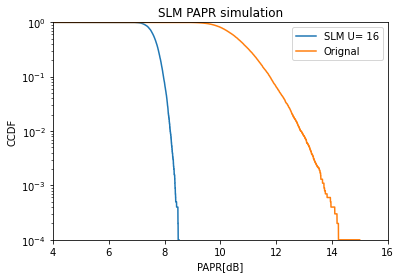

In [ ]:
from scipy.linalg import hadamard
from scipy.stats import ortho_group
U=16  #number of phases
PAPRdB2 = np.zeros(L)   #initialization 
PAPRdBforeverytimeslot = np.zeros(U)   #initialization
TXMATRIX = np.zeros((N,L), dtype=complex)   #initialization 
transmiting_signal1 = np.zeros((N,L), dtype=complex)   #initialization
phases= np.zeros((L), dtype=int)   #initialization 
Hadamard= np.zeros((N,N), dtype=int)   #initialization
neededHadamard= np.zeros((N,L), dtype=int)   #initialization
Data_Had= np.zeros((N,U), dtype=complex)   #initialization
Tx_Data= np.zeros((N,L), dtype=complex)   #initialization
data_final= np.zeros((N,U), dtype=complex)   #initialization
#Hadamard=hadamard(N, dtype=complex)   #hadamard generation
#Hadamard=ortho_group.rvs(dim=N)   #Orthognal phases generation function
Hadamard=complex_ortho_matrix(N,U)

t=0   #initialization
while t<L:   #counter per columns of data
      i=0   #initialization
      while i<U:   #counter per columns of Hadamard    
            Data_Had[:,i]=Data[:,t]*Hadamard[:,i]   #element wise multiplication 
            data_final[:,i] = np.fft.ifft(Data_Had[:,i])   #IFFT 
            [PAPR,PAPRdB] = PAPRforcolumn(data_final[:,i])   #PAPR calculation
            PAPRdBforeverytimeslot[i]=PAPRdB   #list PAPR values for diffrent phases 
            i+=1 

      MinimumPAPR=np.min(PAPRdBforeverytimeslot)   #take the minimum PAPR value in PAPRdBforeverytimeslot array
      needed_Column=0   #initialization
      #loop to determined phase gives us the minimum PAPR
      while needed_Column<U:   
            if PAPRdBforeverytimeslot[needed_Column] == np.min(MinimumPAPR):
               FF=needed_Column   #phase gives us the minimum PAPR
            needed_Column+=1

      transmiting_signal1[:,t]= data_final[:,FF]   #Data after phases and IFFT 
      phases[t] = FF   #needed phases row
      PAPRdB2[t]=PAPRdBforeverytimeslot[FF]   #record the minimum PAPR values for every column in data
      t+=1

transmiting_signal=np.vstack((transmiting_signal1,phases))   #adding phases raw to the TX data

#CCDF drawing
import matplotlib.pyplot as plt
count, bins_count = np.histogram(PAPRdB2,bins=1000000,range=(0,15))
cdf = np.cumsum(count)/L
#plt.plot(bins_count[1:], cdf, label="CDF")   #draw CDF
plt.plot(bins_count[1:], (1-cdf), label='SLM U= '+str(U))   #draw CCDF
plt.legend()

              #####PAPR for Data without SLM reduction technique#####
data_final2 = IFFTformatrix(Data)   #IFFT
[PAPR,PAPRdB]=PAPRformatrix(data_final2)   #PAPR

#CCDF drawing
import matplotlib.pyplot as plt
count, bins_count = np.histogram(PAPRdB,bins=1000000,range=(0,15))
cdf = np.cumsum(count)/L
#plt.plot(bins_count[:], cdf, label="CDF")
plt.plot(bins_count[1:], (1-cdf), label="Orignal")
plt.legend()
plt.yscale('log')
plt.ylim(10**-4,10**0)
plt.xlim(4,16)
plt.xlabel('PAPR[dB]')
plt.ylabel('CCDF')
plt.title('SLM PAPR simulation')